Load Data

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

import warnings 
  
 

warnings.filterwarnings('ignore') 

In [22]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [23]:
df.shape

(768, 9)

In [24]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [25]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Data Visualization

<Axes: >

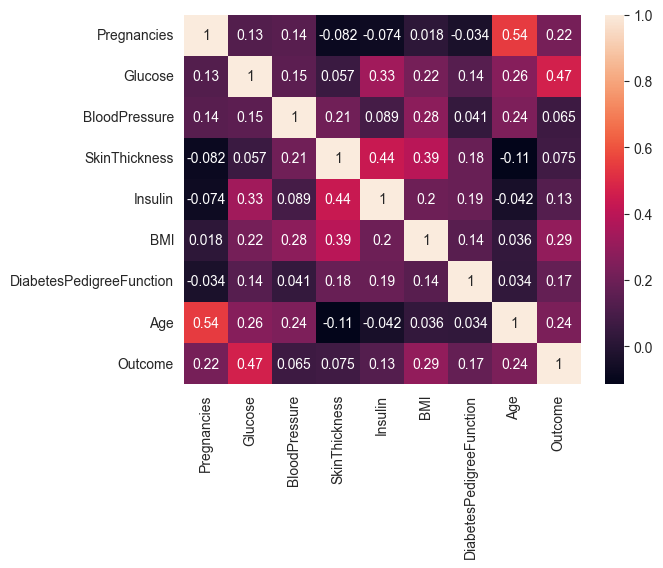

In [28]:
sns.heatmap(df.corr(), annot=True)

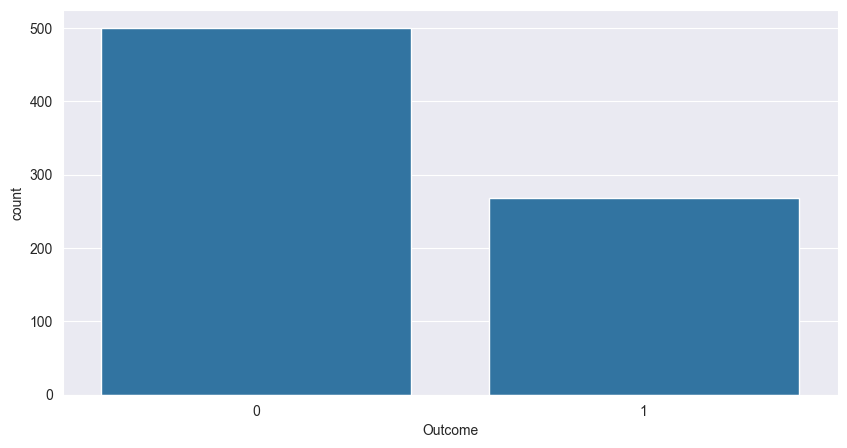

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Outcome',data=df)
plt.show()

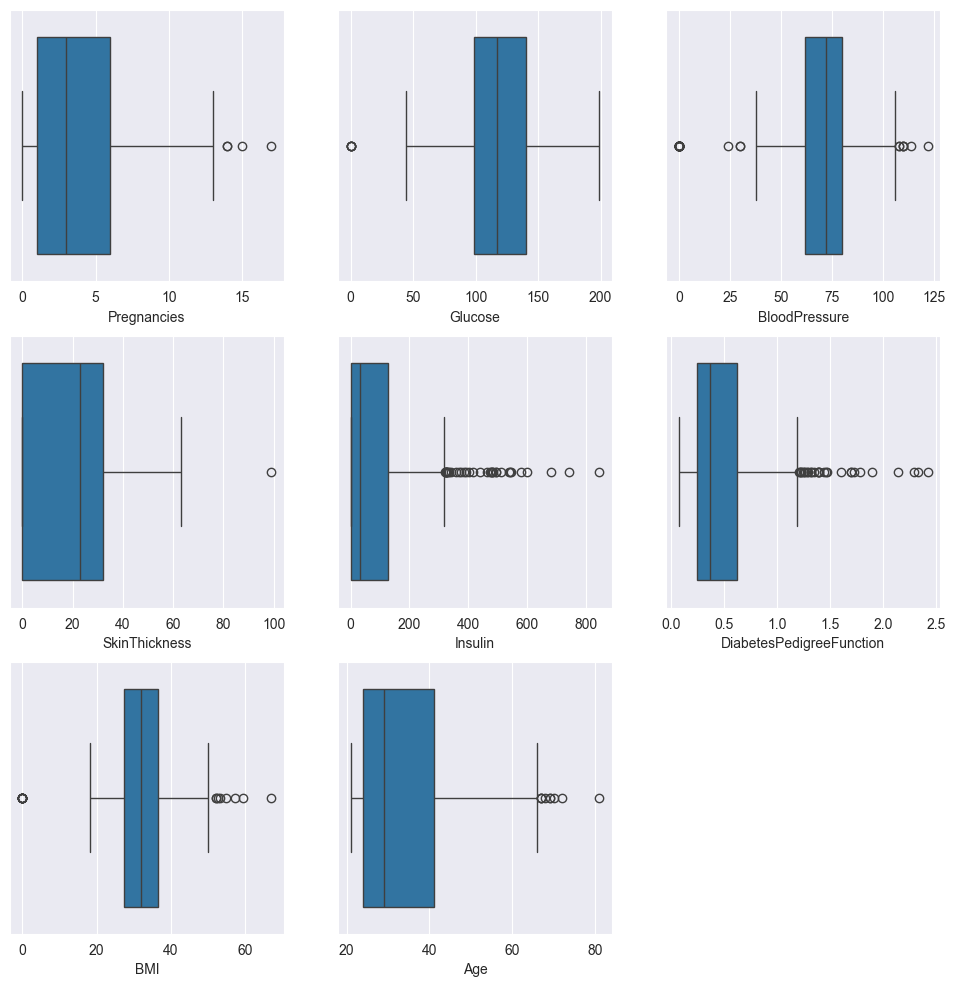

In [30]:
plt.figure(figsize=(12,12))
for i, col in enumerate(['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction','BMI','Age']):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=col,data=df)
plt.show()

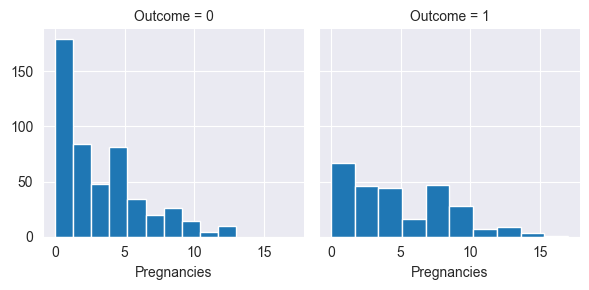

In [31]:
Pregnancies=sns.FacetGrid(df,col='Outcome')
Pregnancies.map(plt.hist,'Pregnancies')

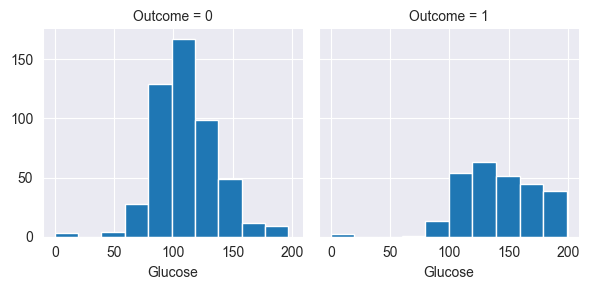

In [32]:
Glucose=sns.FacetGrid(df,col='Outcome')
Glucose.map(plt.hist,'Glucose')

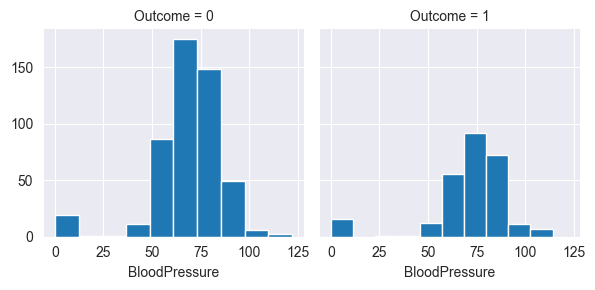

In [33]:
BloodPressure=sns.FacetGrid(df,col='Outcome')
BloodPressure.map(plt.hist,'BloodPressure')

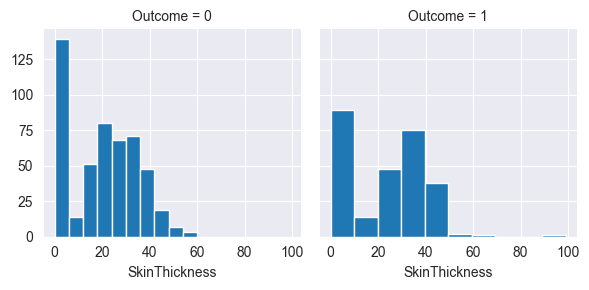

In [34]:
SkinThickness=sns.FacetGrid(df,col='Outcome')
SkinThickness.map(plt.hist,'SkinThickness')

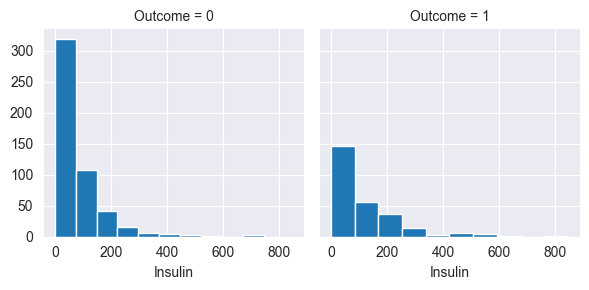

In [35]:
Insulin=sns.FacetGrid(df,col='Outcome')
Insulin.map(plt.hist,'Insulin')

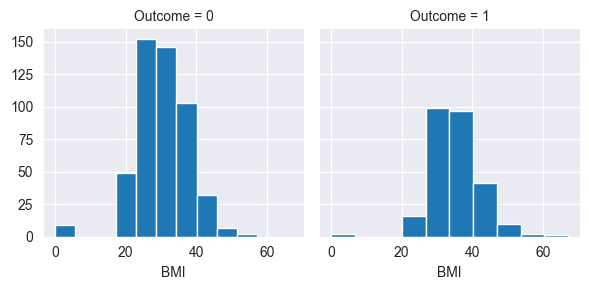

In [36]:
BMI=sns.FacetGrid(df,col='Outcome')
BMI.map(plt.hist,'BMI')

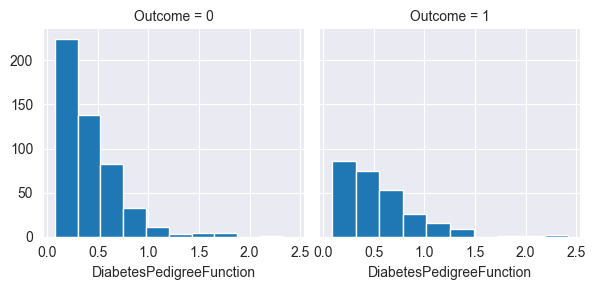

In [37]:
DiabetesPedigreeFunction=sns.FacetGrid(df,col='Outcome')
DiabetesPedigreeFunction.map(plt.hist,'DiabetesPedigreeFunction')

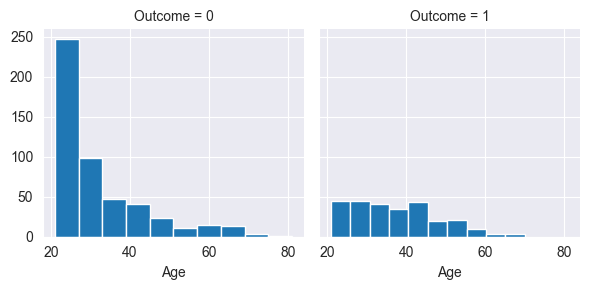

In [38]:
Age=sns.FacetGrid(df,col='Outcome')
Age.map(plt.hist,'Age')

Data Scaling

In [39]:
x=df.iloc[:,:-1]
y=df['Outcome']
y=y.values.reshape(-1,1)

In [40]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

Model

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

In [47]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [48]:
k_values = [i for i in range (1,30)]
scores = []



for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

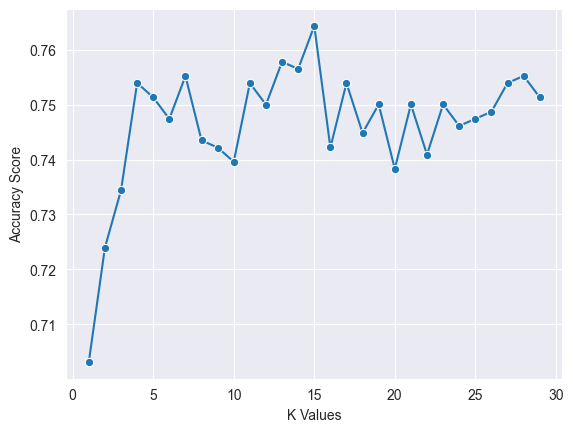

In [49]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [50]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [51]:
y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)


print("Accuracy of the model is: ", accuracy)

Accuracy of the model is:  0.7272727272727273
